<a href="https://colab.research.google.com/github/ahmedmoustafa/AUC-Fundamentals-of-Data-Science-II-Spring-2023/blob/main/examples/maternal-smoking/smoking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maternal Smoking

First, we need to import the packages (libraries) that will be used in the analysis, [Pandas](https://pandas.pydata.org/) for data loading and wrangling, and [Seaborn](https://seaborn.pydata.org/) for data visualization.

In [1]:
import pandas as pd # Import the pandas package using the alias 'pd'
import seaborn as sns # Import the seaborn package using the alias 'sns'

Now, we can easily access the data from an online [`TSV`](https://en.wikipedia.org/wiki/Tab-separated_values) file using Pandas' [read_table()](https://pandas.pydata.org/docs/reference/api/pandas.read_table.html) function. Before moving forward, you may want to open and examine the data file at this link: [https://tinyurl.com/mpd4jx9n](https://tinyurl.com/mpd4jx9n). This will help you gain a better understanding of the data's structure and content.

In [2]:
df = pd.read_table("https://tinyurl.com/mpd4jx9n") # Read and load the tsv data file into a DataFrame
df.shape

(610, 20)

The data got loaded successfully into a Pandas [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) variable called `df`. The [`shape`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html) of the `dataframe` shows that there are `610` rows (records) and `20` columns.

Let's take a quick look at the data using the [`head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) function.

In [3]:
df.head()

,id,date,gestation,weight,parity,mom.race,mom.age,mom.edu,mom.height,mom.weight,dad.race,dad.age,dad.edu,dad.height,dad.weight,marital,income,smoke,quit.time,cigs
0,15,1411,284,120,1,asian,27,5,62,100,asian,31,5,65,110,1,1,never,0,0
1,20,1499,282,113,2,white,33,5,64,135,white,38,5,70,148,1,4,never,0,0
2,100,1673,286,136,4,white,25,2,62,93,white,28,2,64,130,1,4,until_pregnancy,2,2
3,129,1562,245,132,2,black,23,1,65,140,black,23,4,71,192,1,2,never,0,0
4,142,1408,289,120,3,white,25,4,62,125,white,26,1,70,180,0,2,never,0,0


---

## Q1. Does the mom's smoking pattern affect the newborn birth weight?

### Numerically

Let's first see how many different smoking patterns exist in the dataset. We will use the `groupby` function to group the rows (records) in the `DataFrame` by the `smoke` column (variable). Then count the number of different row per each smoking pattern using the `size` function.

In [4]:
df.groupby('smoke').size()

smoke
never              282
now                216
once_not_now        60
until_pregnancy     52
dtype: int64

From the above, we can see that there are four different smoking patterns, `never` (282 rows), `once_not_now` (60 rows), `until_pregnancy` (52 rows), and `now` (216 rows).

Now, let's look at average baby weights for each of these patterns by grouping them and aggregating them by taking `median` of the `weight`.

In [5]:
df.groupby('smoke').agg(Median_Baby_Weight = ('weight', 'median')).reset_index()

,smoke,Median_Baby_Weight
0,never,123.0
1,now,114.5
2,once_not_now,123.5
3,until_pregnancy,124.5


From the table above, we can see that the moms who smoked during pregnancy (`now`) had babies of the lowest birth weight, average of `114.5`.

### Visually

<Axes: xlabel='smoke', ylabel='weight'>

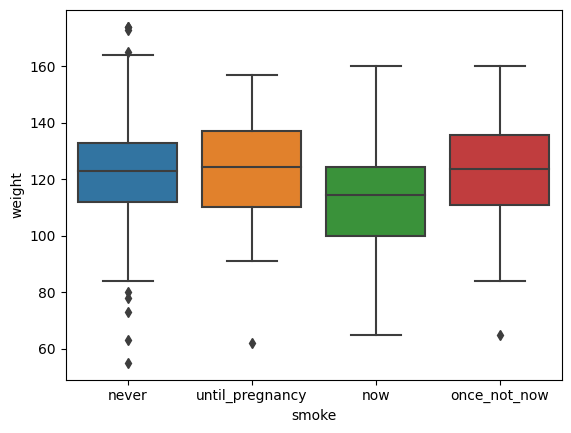

In [6]:
sns.boxplot(data = df, x = 'smoke', y = 'weight')

The effects of maternal smoking on newborn weight are clearly illustrated above.

---

## Q2. Does the mom’s race affect the newborn birth weight?


The mom's race is categorical (*qualitative*), and the baby's weight is numerical (*quantitative*). So, we can visually examine the relationship using a boxplot, where the mom's race is on the x-axis, and the baby's weight is on the y-axis.

<Axes: xlabel='mom.race', ylabel='weight'>

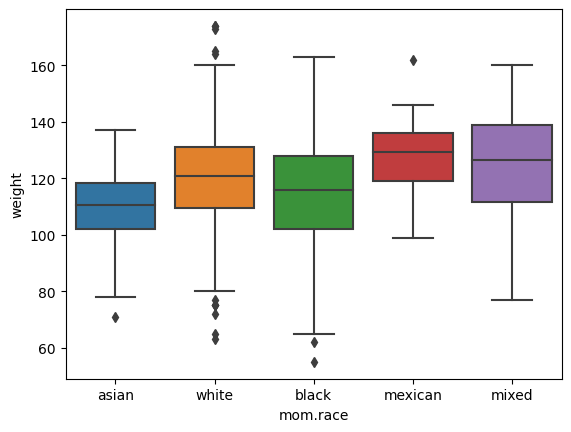

In [7]:
sns.boxplot(data = df, x = 'mom.race', y = 'weight')

We can also use the [**violin** plot](https://en.wikipedia.org/wiki/Violin_plot), which gives similar results to the boxplot but it provides more detailed and honest distribution of the data.

<Axes: xlabel='mom.race', ylabel='weight'>

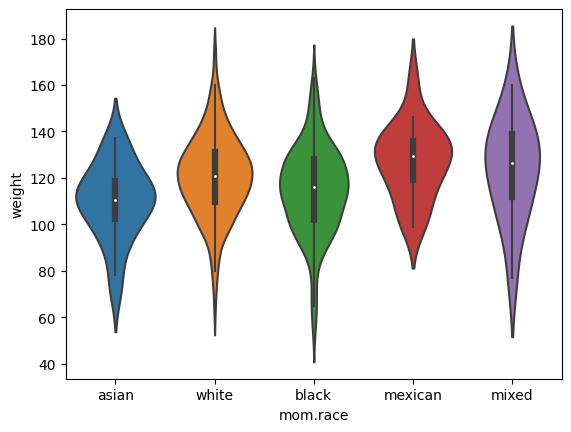

In [8]:
sns.violinplot(data = df, x = 'mom.race', y = 'weight')

---

## Q3. Is there a correlation between the mom’s weight and the baby’s weight?


Here, the two variables are *quantitative* (numerical). In order to examine the relationship between them, we can demonstrate the correlation between the two variables using a scatter plot or a regression line plot.

<Axes: xlabel='mom.weight', ylabel='weight'>

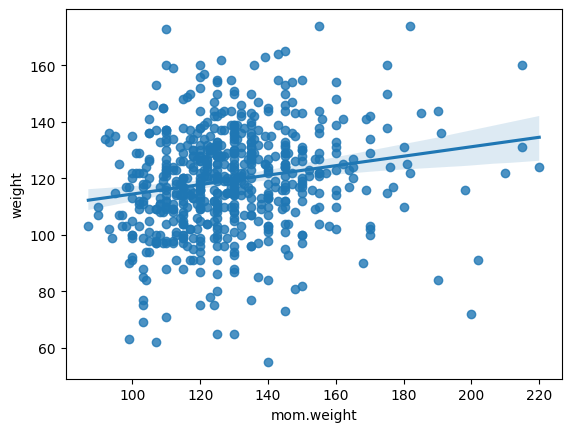

In [9]:
sns.regplot(data = df, x = 'mom.weight', y = 'weight')

From the above figure, we can see that there is a little bit of association between the mom's weight and the baby's weight. It is somehow expected since there is a genetic factor in determining a baby's weight.

---

## Q4. Is there a correlation between the dad’s weight and the dad's height?

## Q5. From Q3 and Q4, which is a stronger correlation?

## Q6. Is there a correlation between the mom’s weight and the dad’s weight?

## Q7. On average, does the mom’s weight change across the races?

## Q8. Does mom’s smoking pattern change with the mom’s education?

These two variables (`mom.edu` and `smoke`) are categorical (*qualitative*). We do not have numbers to able to examine trends in the data. So we will use the `groupby` function to **group** the data according to the *two* variables and use the size function to determine the number of rows (`count`) of different `smoke` patterns under the different `mom.edu` levels. The output will be stored in new data frame called `counts`.

In [10]:
counts = df.groupby(['mom.edu', 'smoke']).size().reset_index(name = 'count')
counts

,mom.edu,smoke,count
0,0,never,1
1,0,once_not_now,1
2,0,until_pregnancy,1
3,1,never,26
4,1,now,46
5,1,once_not_now,6
6,1,until_pregnancy,7
7,2,never,103
8,2,now,90
9,2,once_not_now,14


The above data frame (`counts`) contains 3 columns, `mom.edu`, `smoke`, and `count`, which is the frequency or number of rows for each combination of `mom.edu` and `smoke`.

Now we can plot the counts using a bar plot, where `mom.edu` goes on the x-axis and `count` goes on the y-axis. Then, we can stratify the bars according to `smoke`, which will be used to *color-code* the bars. *Seaborn*'s [`barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html) will take care of the color-coding and generating the corresponding legend for the `smoke` colors (by default, in the top-right corner of the figure).

<Axes: xlabel='mom.edu', ylabel='count'>

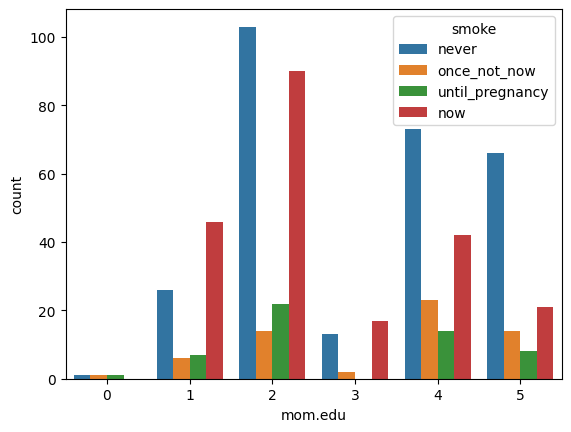

In [11]:
sns.barplot(data = counts, x = "mom.edu", y = 'count', hue = 'smoke')

The above figure suggests decreasing numbers of the `now` smoking pattern as the `mom.edu` increases.

To better represent the distribution of smoking patterns among the different mom's education levels, instead of plotting the counts, we can use the *percentages* of the counts to the total number of moms in each education level. This can provide a better (more accurate or *honest*) representation of the distribution of smoking patterns among the different mom's education levels.

First, we need to obtain the total number of rows (moms) in each education level. To do this, we need to [`groupby`](https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/) again, but this time is based only on `mom.edu`.

In [12]:
totals = df.groupby(['mom.edu']).size().reset_index(name = 'total')
totals

,mom.edu,total
0,0,3
1,1,85
2,2,229
3,3,32
4,4,152
5,5,109


The above table (`dataframe`) `totals` contains the total number of records (rows) for each mom's educational level (`mom.edu`).

Next, we **join** the previously generated `counts` `dataframe` to the newly generated `totals` `dataframe` using Pandas' [`merge`](https://www.geeksforgeeks.org/python-pandas-merging-joining-and-concatenating/) function.

In [13]:
merged = counts.merge (totals, on = 'mom.edu')
merged

,mom.edu,smoke,count,total
0,0,never,1,3
1,0,once_not_now,1,3
2,0,until_pregnancy,1,3
3,1,never,26,85
4,1,now,46,85
5,1,once_not_now,6,85
6,1,until_pregnancy,7,85
7,2,never,103,229
8,2,now,90,229
9,2,once_not_now,14,229


Now, can calculate the percentages of the smoking patterns (`smoke`) under each education level (`mom.edu`) and store the results into a *new* column name (let's call it `percentage`) using Pandas's [`assign()`](https://www.geeksforgeeks.org/python-pandas-dataframe-assign/) function to produce a `dataframe`, let's call it `percentages`.

In [14]:
percentages = merged.assign(percentage = 100 * merged['count'] / merged['total'])
percentages

,mom.edu,smoke,count,total,percentage
0,0,never,1,3,33.333333
1,0,once_not_now,1,3,33.333333
2,0,until_pregnancy,1,3,33.333333
3,1,never,26,85,30.588235
4,1,now,46,85,54.117647
5,1,once_not_now,6,85,7.058824
6,1,until_pregnancy,7,85,8.235294
7,2,never,103,229,44.978166
8,2,now,90,229,39.301310
9,2,once_not_now,14,229,6.113537


Finally, we can plot the `percentages` `dataframe` as a bar chart, where `mom.edu` goes on the x-axis and `percentage` of `smoke` goes on the y-axis, and again the bars are stratified by the smoking pattern (`smoke`).

<Axes: xlabel='mom.edu', ylabel='percentage'>

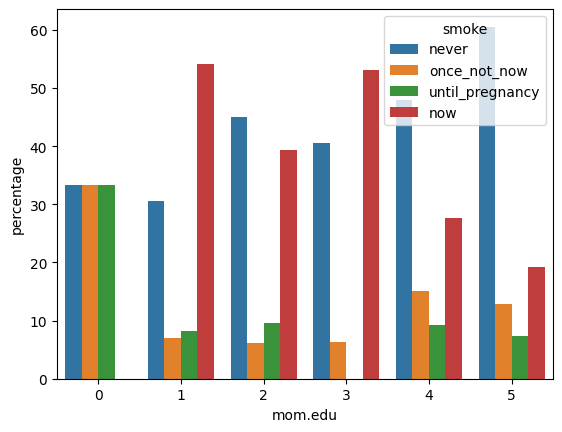

In [15]:
sns.barplot(data = percentages, x = "mom.edu", y = 'percentage', hue = 'smoke')

Compared to the previous plot (which is based on the absolute counts), the new plot (which is based on the percentages [or relative ratios]) clearly shows the moms with the highest level of education (where `mom.edu` equals `5`) had the smallest proportion (`19.2%`) of the `now` smoking pattern across all education levels.

---

## Q9. Does mom’s smoking pattern change with the family income?

## Q10. Is there a relationship between the mom’s race and the dad’s race?